<div style="width:90%; text-align:center; border-width: 0px; display:block; margin-left:auto; margin-right:auto;">
<div class="alert alert-block alert-success" style="text-align:center; color:navy;">
<img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/logo_unb.png" style="width: 200px; opacity:0.85;">
<h1>Universidade de Brasília</h1>
<h2>Instituto de Física</h2>
<hr style="width:44%;border:1px solid navy;">
<h3>Métodos Computacionais A (MCA)</h3> 
<h4>Prof. Bernhard Enders</h4>
<hr style="width:44%;border:1px solid navy;">
</div>
</div>

# **➲ Aula 10 - Equações Diferenciais Ordinárias, Problemas de Valor Inicial e Problemas de Valor de Contorno**

## ➥ Equações Diferenciais Ordinárias
---


Em grande parte, o estudo da física é o estudo de equações diferenciais, então não é nenhuma surpresa que a solução numérica de equações diferenciais seja uma questão central na física computacional, uma vez que a experiência nos mostra que praticamente todas as equações interessantes não são triviais ou são impossíveis de resolver analiticamente. 

Infelizmente, não existe um método melhor para resolver todas as equações diferenciais. Cada equação tem uma característica própria, e um método que funciona bem para uma equação pode funcionar mal, ou até mesmo falhar, para outra.

Já estudamos como obter soluções (raízes) de equações do tipo $ax + b = 0$ e $ax^2 + bx + c = 0$, onde $a$, $b$ e $c$ são constantes. Tais equações são conhecidas como equações algébricas e as incógnitas são números. Em uma equação diferencial, a incógnita é uma função. Uma equação diferencial geralmente envolve essa função e uma ou mais de suas derivadas. Quando essa função depende de uma única variável independente, a equação é chamada de **equação diferencial ordinária (EDO)**. Um exemplo bem simples de EDO é a equação $f'(x) = f(x)$. Este também é um exemplo de uma EDO de **primeira ordem**, já que a derivada mais alta que aparece na equação é uma derivada de primeira ordem. Quando a derivada mais alta em uma EDO é uma **segunda derivada**, temos uma EDO de **segunda ordem**, e assim por diante. Em geral, uma EDO pode ser escrita como:

$$
\frac{d^nf(x)}{dx^n} = F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2},\ldots,\frac{d^{n-1}f(x)}{dx^{n-1}}\right),
$$

De tal modo que podemos escrever, simplificadamente, para uma equação de primeira ordem:

$$
y'(x) = f(x,y).
$$

Como exemplo de equação de segunda ordem, vamos recordar que a equação de movimento de um pêndulo simples pode ser escrita como: 

<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/pendulo-simples.png" align="center"/>
  <p style="text-align:center; font-style:italic;">
    A equação de movimento de um pêndulo simples é um exemplo de EDO.<br>
    Fonte: Burden, R.L.; Faires, J.D.; Burden, A.M. Numerical Analysis. Cengage Learning, 2015.
  </p> 
  </center>
</div>

$$
\frac{d^2\theta}{dt^2} + \frac{g}{L}\text{sen}\,\theta=0.
$$

Se estabelecermos duas condições iniciais para este problema, como, por exemplo, o ângulo e a velocidade angular inicial, teremos então um **Problema de Valor Inicial (PVI)** cuja solução não é mais uma família de funções mas sim uma função em particular (caso o problema seja bem-posto e admita solução única). 

$$
\frac{d^2\theta}{dt^2} + \frac{g}{L}\text{sen}\,\theta=0, \qquad \theta(t_0)=\theta_0, \quad \theta'(t_0)=\theta_0'.
$$

Se estabelecermos agora uma condição inicial e uma condição final, teremos então um **Problema de Valores de Contorno  (PVC)**, e.g.: 

$$
\frac{d^2\theta}{dt^2} + \frac{g}{L}\text{sen}\,\theta=0, \qquad \theta(t_0)=\theta_0, \quad \theta(t_n)=\theta_n.
$$

A solução do PVI com $\theta'(t_0)=0$ fornece o período do pêndulo, que é uma função do comprimento do fio, dada por:

$$
T = 4\sqrt{\frac{L}{2g}}\int_0^{\theta_0} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}.
$$

Esta é uma integral elíptica de primeiro tipo e é um resultado exato para o período do pêndulo. Mas é claro, resta avaliar a integral. Podemos utilzar qualquer método estudado de integração numérica a fim de obter o valor numérico para o período do pêndulo.

## ➠ O Método de Euler

O método de Euler é um procedimento numérico de primeira ordem para solucionar equações diferenciais ordinárias com um valor inicial dado, isto é, para solucionar PVIs. É o tipo mais básico de método explícito para integração numérica para equações diferenciais ordinárias.

Suponha que queremos aproximar a solução de um problema de valor inicial:

$$
{\displaystyle y'(t)=f(t,y(t)),\qquad \qquad y(t_{0})=y_{0}.}
$$

Para tanto vamos recordar da seguinte aproximação em série de Taylor em torno do ponto $t_i$:

$$
y(t_i+h) = y(t_i) + hy'(t_i) + \mathcal O(h)
$$

Levando-se em consideração nossa EDO inicial, teremos que

$$
y_{i+1} \approx y_i + hf(t_i,y_i),
$$

que a primeira aproximação da derivada para no método de Euler (vide figura abaixo).

<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/euler.png" align="center"/>
  <p style="text-align:center; font-style:italic;">
    O método de Euler utiliza os valores (condições) iniciais como uma primeira aproximação para a solução da equação diferencial ou PVI.
  </p> 
  </center>
</div>


### ✍🏼 Exemplo

Vamos exemplificar o método com o seguinte PVI:

$$
y' = y - t^2 + 1,\quad 0 ≤ t ≤ 2,\quad y(0) = 0,5
$$

Note que $f(t,y) = y - t^2 + 1$. Tomaremos, inicialmente, $h=0,5$ a fim de obtermos as seguintes aproximações:

\begin{align*}
y_0 &= y(0) = 0.5\\
y_1 &= y_0 + 0.5(y_0 − (0.0)^2 + 1) = 0.5 + 0.5(1.5) = 1.25\\
y_2 &= y_1 + 0.5(y_1 − (0.5)^2 + 1) = 1.25 + 0.5(2.0) = 2.25\\
y_3 &= y_2 + 0.5(y_2 − (1.0)^2 + 1) = 2.25 + 0.5(2.25) = 3.375\\
y_4 &= y_3 + 0.5(y_3 − (1.5)^2 + 1) = 3.375 + 0.5(2.125) = 4.4375
\end{align*}

Como $t_i = a +ih$, temos que $t_4 = 0 + 4h => t_4 = 2\,$s. Ou seja, $y_4 = y(2) = 4.4375$. O valor exato pode ser obtido da solução exata desta EDO: 

$$
y(t) = (t + 1)^2 - 0.5\text{e}^t\\
y(2) = (2 + 1)^2 - 0.5\text{e}^2 \approx 5.3055\\
$$





Podemos reduzir o passo $h$ a fim de obter uma aproximação melhor com o método de Euler. Faremos isso utilizando Python:


In [19]:
import math
import numpy as np


def f(t, y):
    return y - t * t + 1


def exata(t):
    return (t + 1) ** 2 - 0.5 * np.exp(t)


def euler(func, a, b, n, y0):
    t = np.linspace(a, b, n + 1)
    h = t[1] - t[0]
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(0, n):
        y[i + 1] = y[i] + h * func(t[i], y[i])

    return t, y

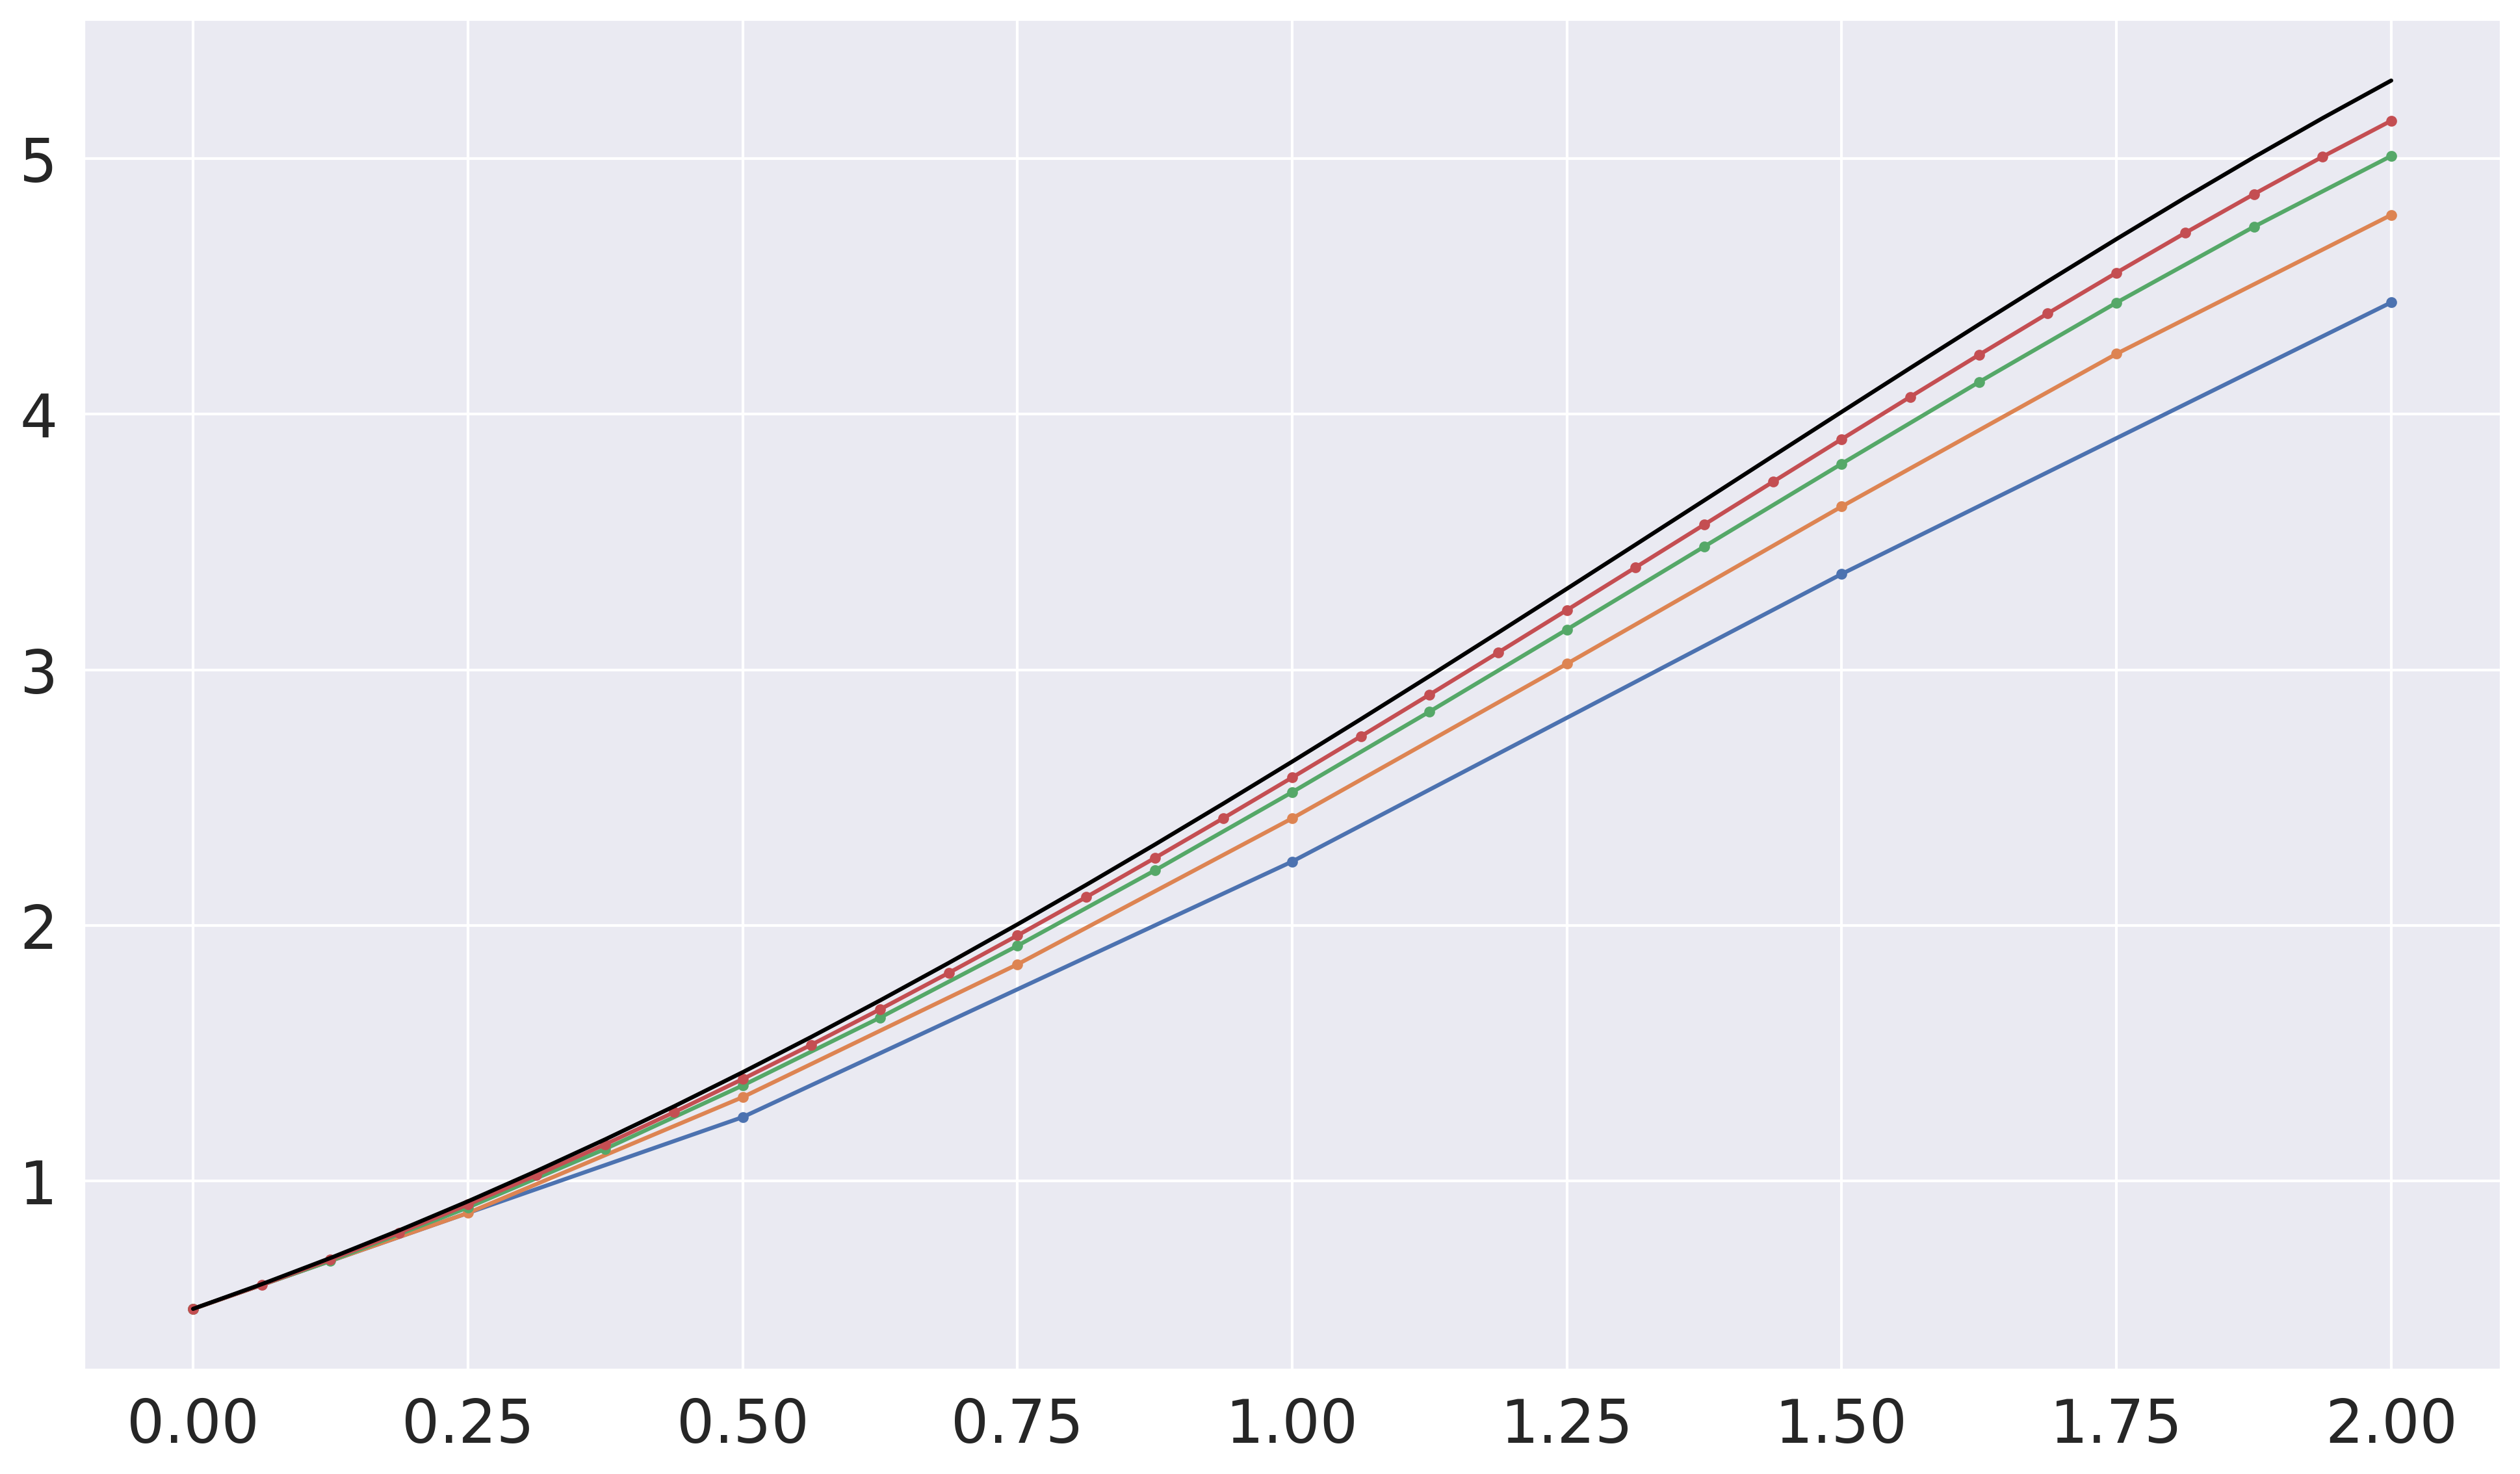

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme()
sns.set(font="Verdana")
sns.set(font_scale=2)

a = 0
b = 2
y0 = 0.5

ns = [2**i for i in range(2, 6)]
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
for n in ns:
    t, y = euler(f, a, b, n, y0)
    ax.plot(t, y, marker=".")

t = np.linspace(a, b, n+1)
ax.plot(t, exata(t), color='black')
plt.show()


## ➠ Métodos de Taylor de Ordem Superior

O método de Euler foi originado da expansão em série de Taylor com erro local de truncamento (ELT) de primeira ordem. Podemos obter métodos de ordem mais alta e, consequentemente, com menor ELT, via série de Taylor ao tomarmos mais termos (termos de derivada mais alta).

Considere novamente o problema de valor inicial

$$
{\displaystyle y'(t)=f(t,y(t)),\qquad a ≤ t ≤ b \qquad y(t_{0})=y_{0}.}
$$

e sua expansão em série de Taylor (em torno do ponto $t_i$):

$$
y(t_{i+1}) \approx y(t_{i}) + hy'(t_{i}) + \frac{h^2}{2}y''(t_{i}) + \frac{h^3}{3!}y'''(t_{i}) + \dots
$$

A diferenciação sucessiva da solução $y(t)$ nos fornece: 

\begin{gather*}
 y'(t) = f(t,y(t)),\\
 y''(t) = f'(t,y(t)),\\
 \ldots\\
y^{(k)}(t) = f^{(k)}(t,y(t)).
\end{gather*}

O que, substituindo de volta em nossa expansão anterior, resulta na seguinte expressão para o método de Taylor de ordem $n$:

$$
y(t_{i+1}) = y(t_{i}) + hf(t_i,y(t_i)) + \frac{h^2}{2}f'(t_i,y(t_i)) + \dots + \frac{h^n}{n!}f^{n-1}(t_i,y(t_i)) + \mathcal O(h^{n+1}).
$$

### ✍🏼 Exemplo

Resolva novamente o PVI do exemplo anterior,

$$
y' = y - t^2 + 1,\quad 0 ≤ t ≤ 2,\quad y(0) = 0,5
$$

utilizando um método de Taylor de ordem 2.

Para o método $\mathcal O(h^2)$ precisamos somente da derivada primeira. Uma vez que

$$
f(t, y(t)) = y(t) - t^2 + 1,
$$

teremos que 

$$
f'(t, y) = \frac{d}{dt}(y - t^2 + 1) = y' - 2t = y - t^2 + 1 - 2t,
$$

e nossa aproximação de segunda ordem pode então ser obtida pelo seguinte procedimento iterativo:

\begin{align*}
y_{i+1} &= y_i + hf(t_i,y_i) + \frac{h^2}{2}f'(t_i,y_i)\\
        &= y_i + h(y_i - t_i^2 + 1) + \frac{h^2}{2}(y_i - t_i^2 + 1 - 2t_i)
\end{align*}




In [21]:
def dfdt(t, y):
    """primeira derivada de f(t,y)"""
    return y - t * t + 1 - 2 * t


def taylor2(func, dfdt, a, b, n, y0):
    """método de taylor de 2a ordem para PVIs"""
    t = np.linspace(a, b, n + 1)
    h = t[1] - t[0]
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(0, n):
        y[i + 1] = y[i] + h * func(t[i], y[i]) + 0.5 * h**2 * dfdt(t[i], y[i])

    return t, y


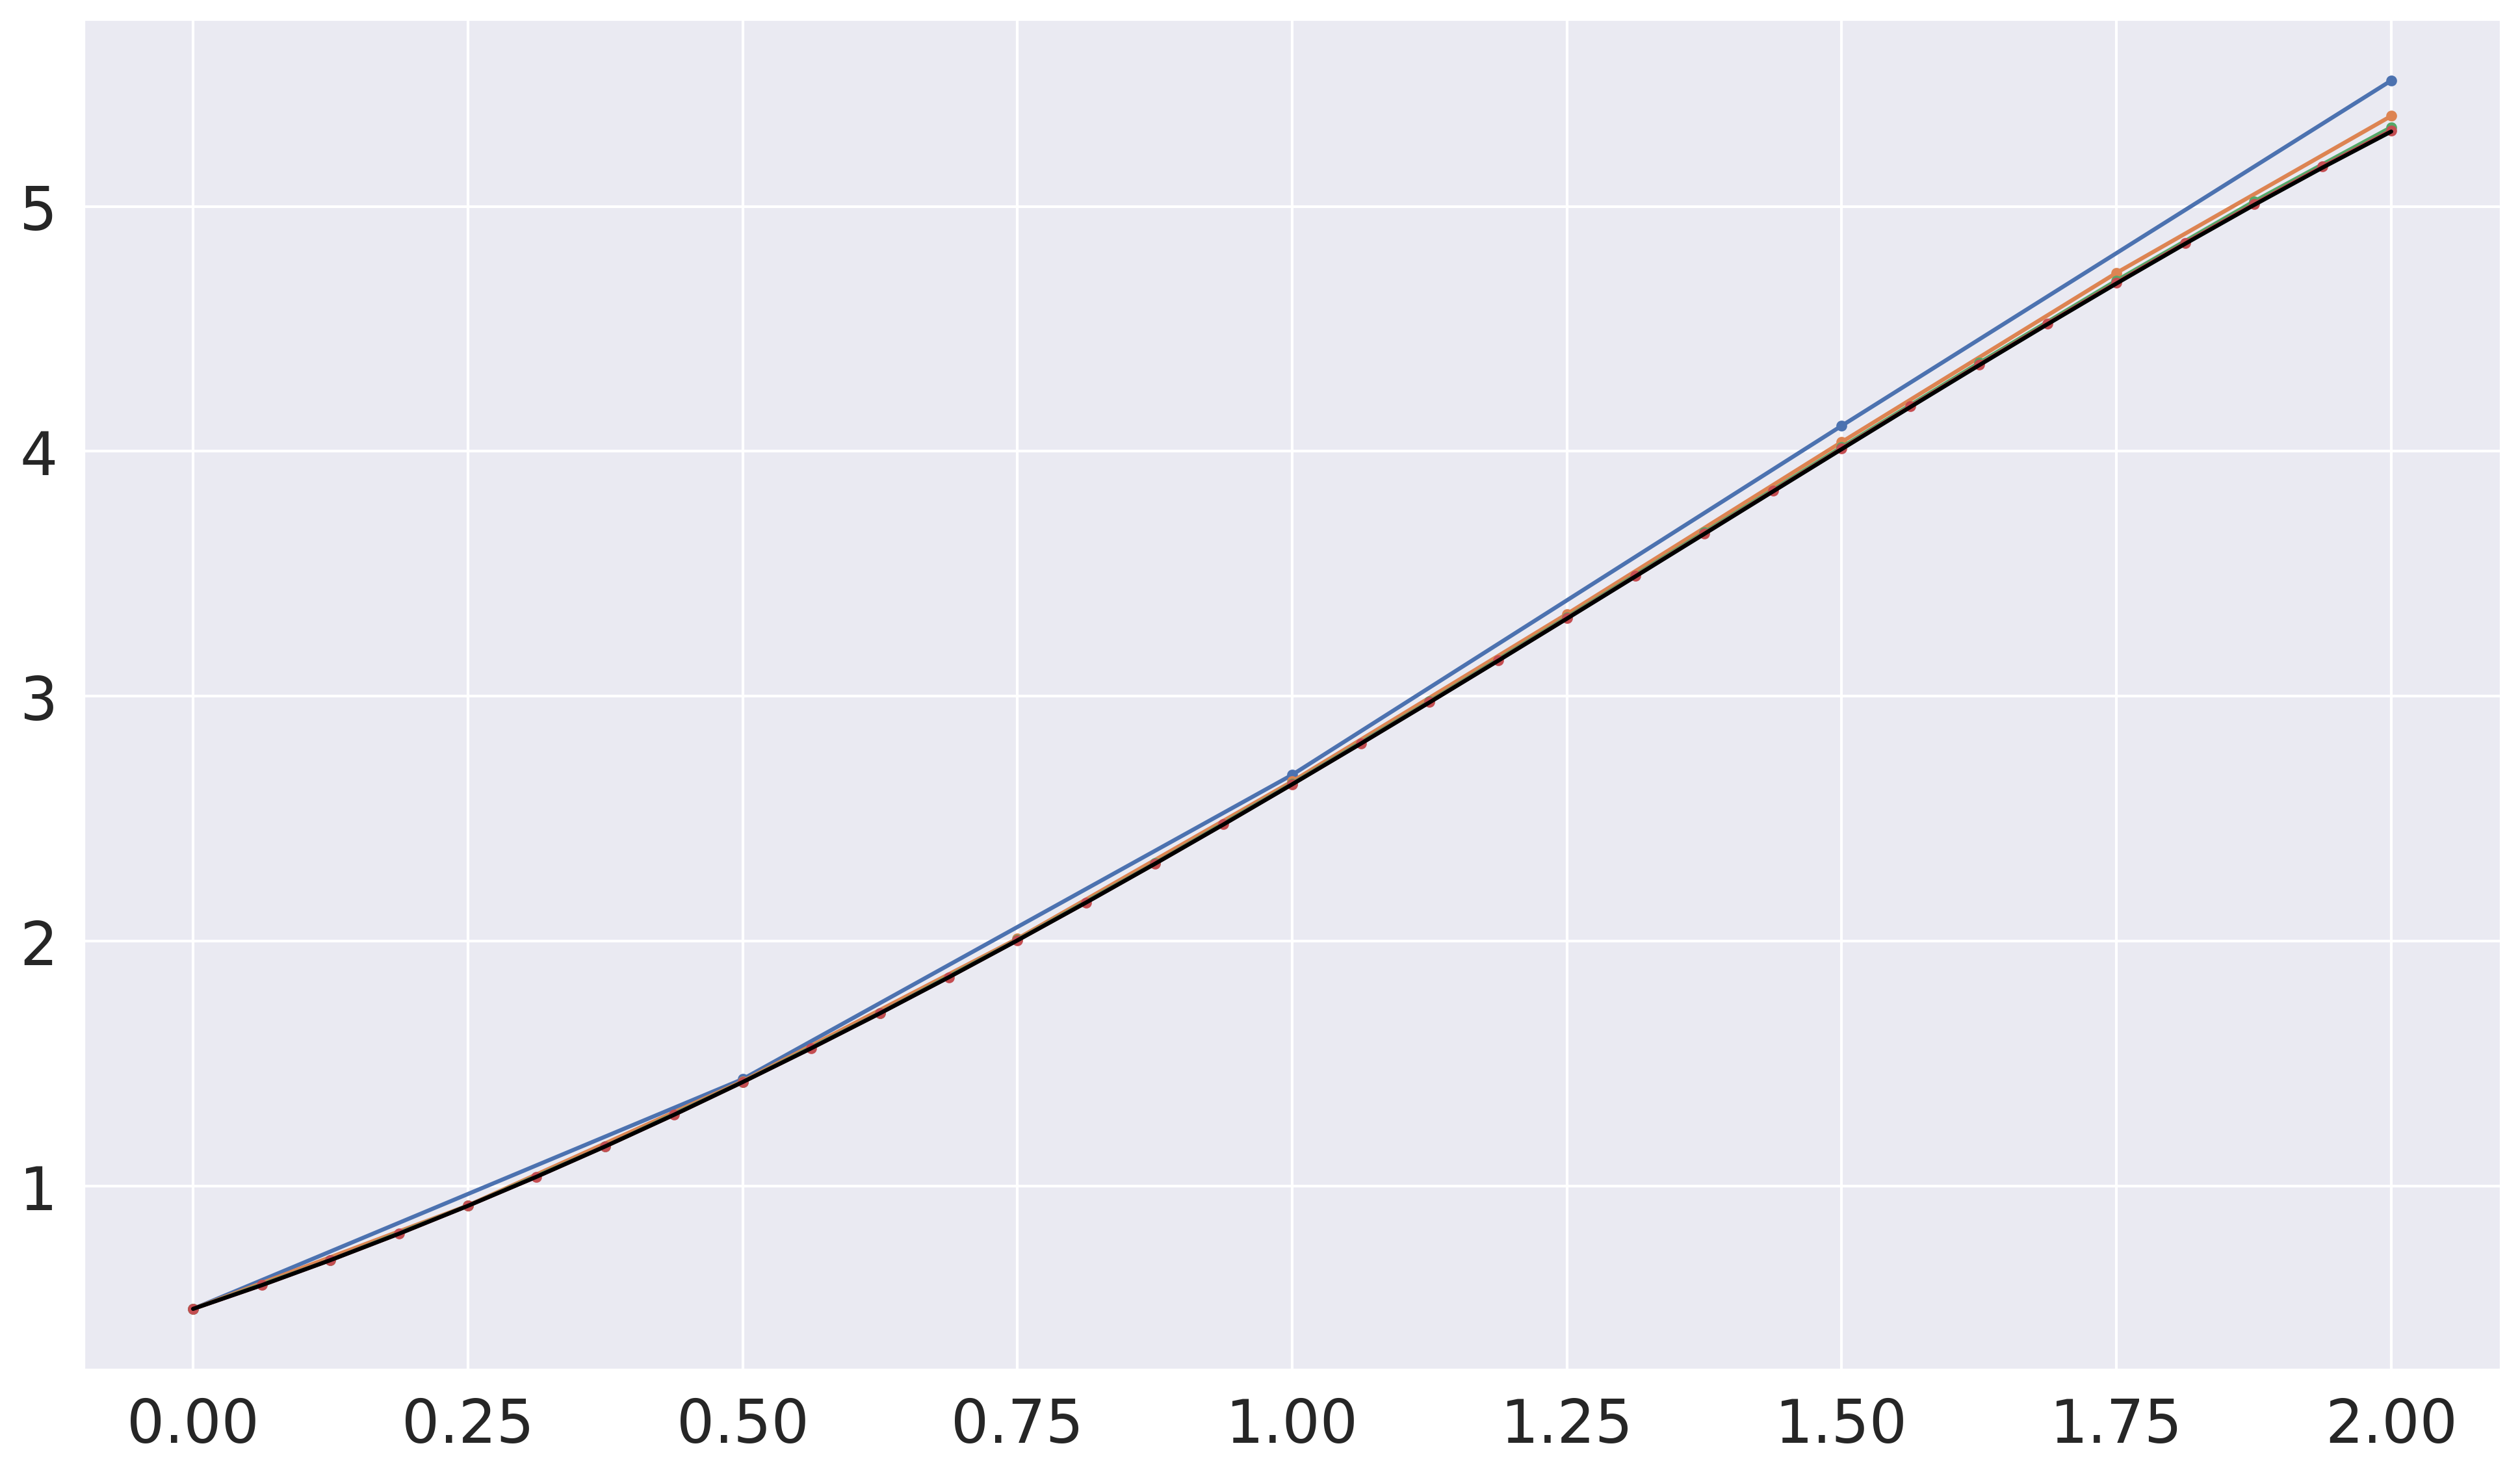

In [22]:
ns = [2**i for i in range(2, 6)]
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
for n in ns:
    t, y = taylor2(f, dfdt, a, b, n, y0)
    ax.plot(t, y, marker=".")

t = np.linspace(a, b, n + 1)
ax.plot(t, exata(t), color="black")
plt.show()

## ➠ Sistemas de Equações Diferenciais

Os problemas de valores iniciais para equações diferenciais de ordem superior a um, como a equação do pêndulo simples exemplificada anteriormente, recaem em sistemas de equações diferenciais pois são reduzidos a várias EDOs de 1ª ordem por substituição de variáveis.

Como exemplo, considere o PVI abaixo:

$$
y'' - 2y' + 2y = \text{e}^{2t} \text{sen}\,t,\quad  0 ≤ t ≤ 1,\quad y(0) = −0.4,\ y'(0) = −0.6
$$

Vamos utilizar as seguintes novas variáveis: $u_1(t) = y(t)$ e $u_2(t) = y'(t)$. Isso transforma nossa equação de segunda ordem no seguinte sistema de equações diferenciais de 1ª ordem:

\begin{gather}
u_1'(t) = u_2(t),\\
u_2'(t) = \text{e}^{2t}\text{sen}\,t − 2u_1(t) + 2u_2(t),
\end{gather}

com as condições iniciais: $u_1(0) = −0.4, u_2(0) = −0.6$.

Não precisamos de nenhum método novo para resolver tal sistema, basta aplicar o método de Euler (ou outro método de maior acurácia, e.g. Runge–Kutta–Fehlberg) simultaneamente às duas equações acima. Ou seja:

\begin{gather}
u_1(t_i + 1) = u_1(t_i) + hu_2(t_i),\\
u_2(t_i + 1) = u_2(t_i) + h[\text{e}^{2t_i}\text{sen}\,t_i − 2u_1(t_i) + 2u_2(t_i)]
\end{gather}

In [23]:
from tabulate import tabulate

# número de subintervalos
n = 8

# intervalo de integração
a = 0
b = 1

# pontos da malha
t = np.linspace(a, b, n + 1)

# passo da malha
h = t[1] - t[0]

# solução aproximada inicializada com zeros
u1 = np.zeros(len(t))
u2 = np.zeros(len(t))

# condições iniciais
u1[0] = -0.4
u2[0] = -0.6 

# solução aproximada (via método de Euler)
for i in range(0, n):
    u1[i + 1] = u1[i] + h * u2[i]
    u2[i + 1] = u2[i] + h * (np.exp(2*t[i])*np.sin(t[i]) - 2*u1[i] + 2*u2[i])

# exibe a solução aproximada em formato de tabela
tabulate(np.transpose([t,u1,u2]), tablefmt='html')

0,-0.4,-0.6
0.125,-0.475,-0.65
0.25,-0.55625,-0.673739
0.375,-0.640467,-0.652124
0.5,-0.721983,-0.558113
0.625,-0.791747,-0.354244
0.75,-0.836028,0.0104051
0.875,-0.834727,0.603875
1,-0.759243,1.51564


<div class="alert alert-block alert-warning"> 
<h3>📝 EXERCÍCIO</h3>
</div>

 Use o método de Euler para resolver o PVI: 

\begin{cases} 
\displaystyle\frac{dy}{dx}= -1.2y + 7\text{e}^{-0.3x}\\ 
y(0) = 3 
\end{cases}

Compare o resultado com a solução analítica:

$$
y = f(x) = \frac{70}{9}\text{e}^{-0.3x} - \frac{43}{9}\text{e}^{-1.2x}.
$$

computando o erro relativo (percentual) em cada ponto. Verifique que o erro percentual do método de Taylor de ordem 2 é muito melhor. 

## ➠ Problema de Valor de Contorno

Podemos utilizar nossas aproximações em diferenças finitas para transformar um problema de valor de contorno de qualquer ordem em um sistema de equações lineares. 